# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import x, t, y

print('data shape:', x.shape, t.shape, y.shape)

data shape: (500, 500) (500, 500) (500, 500)


## Reshape data for Dense network

In [3]:
X = np.reshape([x, t], (2, -1)).T
Y = y.reshape(-1)
X.shape, Y.shape

((250000, 2), (250000,))

In [4]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.50,
                                                    random_state=0)
X_train.shape, y_test.shape

((125000, 2), (125000,))

# Build the model

In [5]:
model = Sequential()

model.add(Dense(10))
model.add(Activation('elu'))

# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(1))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [6]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=128,
              verbose=2,
              validation_split=0.4,
              callbacks=[early_stopping])

In [7]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
586/586 - 1s - loss: 0.5551 - mae: 0.6454 - val_loss: 0.4648 - val_mae: 0.6090
Epoch 2/100
586/586 - 1s - loss: 0.4326 - mae: 0.5864 - val_loss: 0.4012 - val_mae: 0.5649
Epoch 3/100
586/586 - 1s - loss: 0.3665 - mae: 0.5357 - val_loss: 0.3307 - val_mae: 0.5055
Epoch 4/100
586/586 - 1s - loss: 0.2943 - mae: 0.4731 - val_loss: 0.2552 - val_mae: 0.4360
Epoch 5/100
586/586 - 1s - loss: 0.2069 - mae: 0.3855 - val_loss: 0.1489 - val_mae: 0.3170
Epoch 6/100
586/586 - 1s - loss: 0.1077 - mae: 0.2574 - val_loss: 0.0762 - val_mae: 0.2088
Epoch 7/100
586/586 - 1s - loss: 0.0612 - mae: 0.1867 - val_loss: 0.0490 - val_mae: 0.1669
Epoch 8/100
586/586 - 1s - loss: 0.0417 - mae: 0.1510 - val_loss: 0.0367 - val_mae: 0.1370
Epoch 9/100
586/586 - 1s - loss: 0.0328 - mae: 0.1281 - val_loss: 0.0313 - val_mae: 0.1244
Epoch 10/100
586/586 - 1s - loss: 0.0287 - mae: 0.1145 - val_loss: 0.0281 - val_mae: 0.1123
Epoch 11/100
586/586 - 1s - loss: 0.0268 - mae: 0.1069 - val_loss: 0.0267 - val_mae: 0.10

Epoch 91/100
586/586 - 1s - loss: 0.0088 - mae: 0.0488 - val_loss: 0.0095 - val_mae: 0.0501
Epoch 92/100
586/586 - 1s - loss: 0.0087 - mae: 0.0485 - val_loss: 0.0099 - val_mae: 0.0522
Epoch 93/100
586/586 - 1s - loss: 0.0087 - mae: 0.0487 - val_loss: 0.0096 - val_mae: 0.0511
Epoch 94/100
586/586 - 1s - loss: 0.0086 - mae: 0.0484 - val_loss: 0.0090 - val_mae: 0.0489
Epoch 95/100
586/586 - 1s - loss: 0.0085 - mae: 0.0483 - val_loss: 0.0090 - val_mae: 0.0492
Epoch 96/100
586/586 - 1s - loss: 0.0084 - mae: 0.0481 - val_loss: 0.0090 - val_mae: 0.0501
Epoch 97/100
586/586 - 1s - loss: 0.0084 - mae: 0.0481 - val_loss: 0.0089 - val_mae: 0.0496
Epoch 98/100
586/586 - 1s - loss: 0.0083 - mae: 0.0479 - val_loss: 0.0090 - val_mae: 0.0501
Epoch 99/100
586/586 - 1s - loss: 0.0083 - mae: 0.0478 - val_loss: 0.0089 - val_mae: 0.0496
Epoch 100/100
586/586 - 1s - loss: 0.0082 - mae: 0.0478 - val_loss: 0.0087 - val_mae: 0.0483


# Model accuracy with MAE

In [8]:
p = model.predict(X_test).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 4.75e-02
MAE for test     set: 4.73e-02


Text(0.5, 0.92, 'Residual')

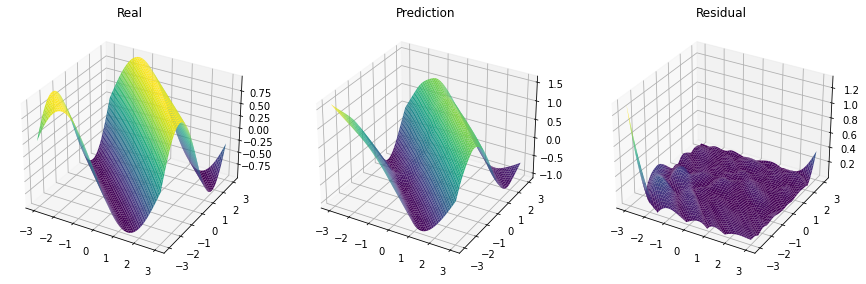

In [9]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(x, t, y, cmap='viridis')
ax.set_title('Real')

ax = fig.add_subplot(1, 3, 2, projection='3d')
pp = model.predict(X).reshape(x.shape)
ax.plot_surface(x, t, pp, cmap='viridis')
ax.set_title('Prediction')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(x, t, np.abs(pp - y), cmap='viridis')
ax.set_title('Residual')

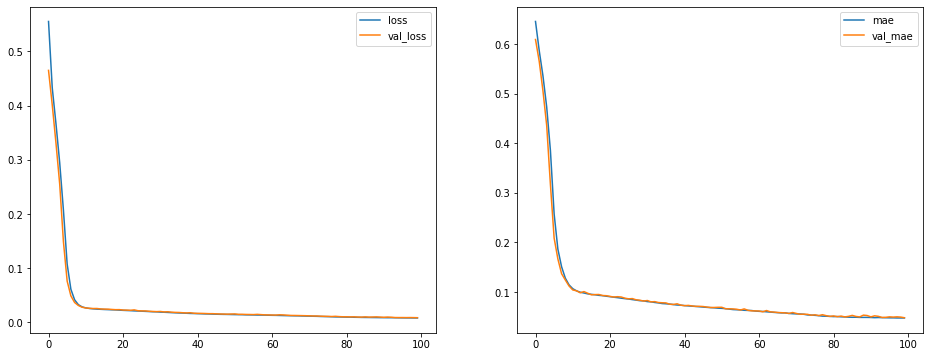

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()